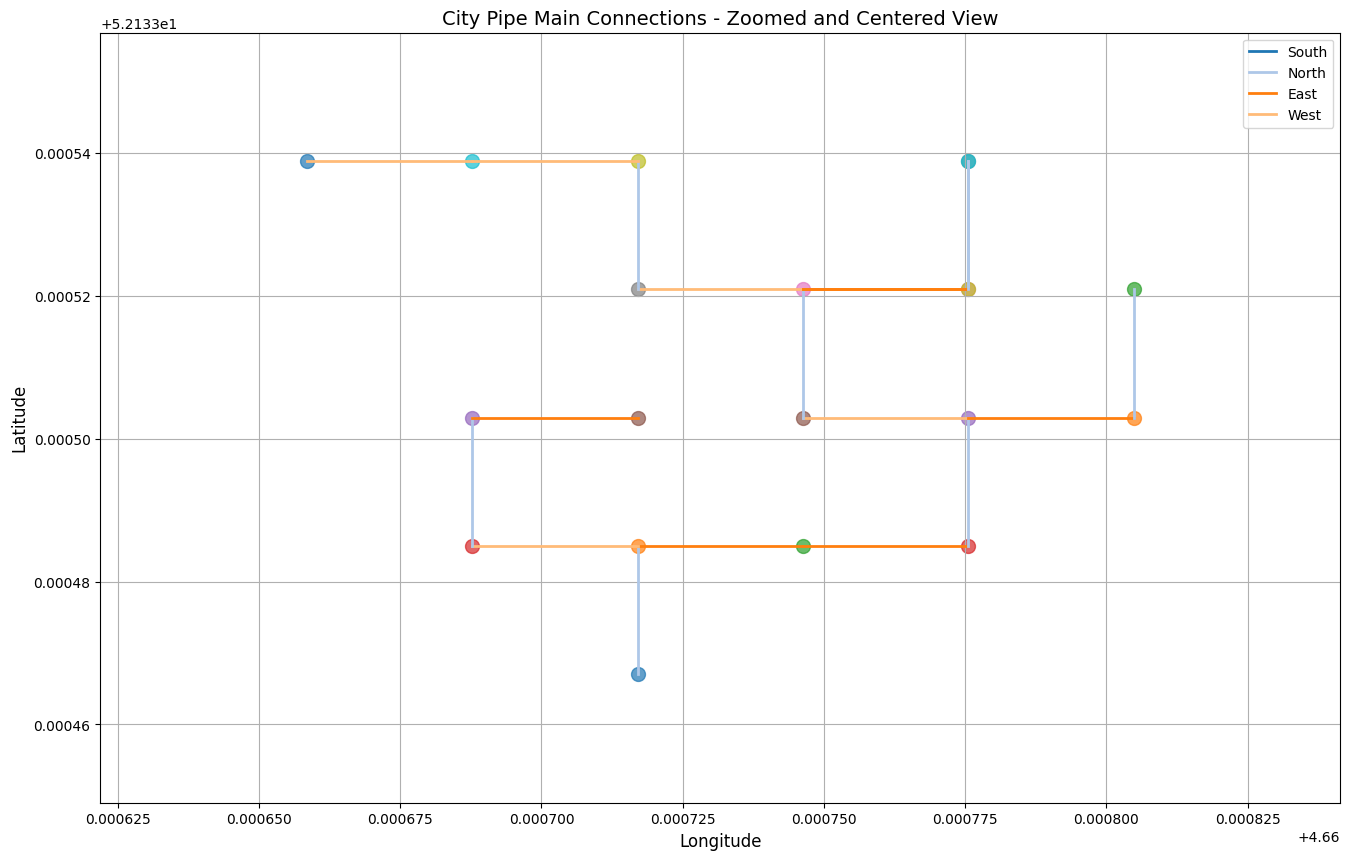

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the dataset
file_path = 'City_Pipe_Main.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Define direction colors for visualization
directions = data['Direction'].unique()
direction_colors = {direction: plt.cm.tab20(i) for i, direction in enumerate(directions)}

# Create edges based on parent-child relationships
edges = []
positions = {}

for _, row in data.iterrows():
    # Store positions of nodes for scatter plot
    positions[row['SegmentID']] = (row['Longitude'], row['Latitude'])
    
    # Check for valid parent-child relationships
    if pd.notna(row['Parent Pipe']):
        parent_row = data[data['SegmentID'] == row['Parent Pipe']]
        if not parent_row.empty:
            parent_lat, parent_lon = parent_row.iloc[0]['Latitude'], parent_row.iloc[0]['Longitude']
            color = direction_colors.get(row['Direction'], 'black')
            edges.append(((parent_lon, parent_lat), (row['Longitude'], row['Latitude']), color))

# Calculate the center of the data for automatic centering
center_lon = (data['Longitude'].max() + data['Longitude'].min()) / 2
center_lat = (data['Latitude'].max() + data['Latitude'].min()) / 2
lon_range = data['Longitude'].max() - data['Longitude'].min()
lat_range = data['Latitude'].max() - data['Latitude'].min()

# Adjust zoom to tightly focus on the center of the data
zoom_factor = 1.5  # Adjust this value for more or less zoom

plt.figure(figsize=(16, 10))

# Plot edges with color-coding based on direction
for edge in edges:
    x_coords = [edge[0][0], edge[1][0]]
    y_coords = [edge[0][1], edge[1][1]]
    plt.plot(x_coords, y_coords, color=edge[2], linewidth=2)

# Plot nodes as scatter points
for node, (lon, lat) in positions.items():
    plt.scatter(lon, lat, s=100, alpha=0.7)

# Add title, labels, and legend
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title("City Pipe Main Connections - Zoomed and Centered View", fontsize=14)

# Create a custom legend for directions
custom_lines = [Line2D([0], [0], color=color, lw=2) for color in direction_colors.values()]
plt.legend(custom_lines, list(direction_colors.keys()), loc='upper right', fontsize=10)

# Adjust axes to zoom and center on the data
plt.xlim(center_lon - (lon_range / 2 * zoom_factor), center_lon + (lon_range / 2 * zoom_factor))
plt.ylim(center_lat - (lat_range / 2 * zoom_factor), center_lat + (lat_range / 2 * zoom_factor))

plt.grid(True)
plt.show()